## 다중 선형회귀
- Multiple Linear Regression
- 여러 개의 독립 변수(x)와 하나의 종속 변수(y)의 선형 관계를 모델링하는 것

### Auto MPG 데이터를 사용해서 연비 데이터 예측하기
- [Dataset](https://www.kaggle.com/datasets/uciml/autompg-dataset)
- 데이터 꼭 확인하기
- 자동차 연비에 영향을 주는 피쳐들은 무엇일지 고민을 해야 함. 어떤 피쳐들을 추출해낼까?

### 데이터 준비

In [ ]:
import pandas as pd

mpg = pd.read_csv('./auto-mpg.csv', na_values="?")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
# 데이터 정보 확인하기
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### 결측치 확인 및 처리

In [ ]:
mpg.isnull().sum()
# ['horsepower']에 결측치가 있다다

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
# 6개의 결측치 확인
df = mpg[mpg['horsepower'].isna()]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [ ]:
# 결측치를 포함한 행을 삭제한다
mpg = mpg.dropna()
mpg.isna().sum(axis=0)
# isna() == isnull()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### 피쳐 추출하기

In [ ]:
# 피쳐와 레이블 분리
# 피쳐로 사용할 컬럼 데이터만 추출
X_data = mpg.drop(['mpg', 'car name'], axis=1)
X_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [ ]:
y_data = mpg['mpg']
y_data

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

### train/test 데이터셋 분리하기

In [ ]:
# 테스트 데이터 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(313, 7) (79, 7)
(313,) (79,)


### 데이터 정규화

- `StandardScaler`: 평균 0, 표준편차 1을 기준으로 정규화
  - 데이터의 특징을 모르는 경우 무난하게 사용할 수 있는 방법
- `MinMaxScaler`: 최솟값 0, 최댓값 1을 기준으로 정규화
  - 각 피쳐의 최솟값과 최댓값을 기준으로 0~1 구간 내에 균등하게 값을 배정하는 방법
  - 이상치에 민감하다는 단점

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(X_train_s[:5])

[[ 0.30486156  0.28457757  0.14142863  0.75480297  1.1217589   0.49452752
  -0.68982474]
 [-0.87318372 -0.53588042 -0.32949862 -0.49312922 -0.22893966 -0.0572982
  -0.68982474]
 [ 0.30486156 -0.23665456 -0.19868549 -0.00252992 -0.37111846 -0.33321105
  -0.68982474]
 [ 1.48290683  1.18225513  1.18793363  1.3680521  -0.72656545 -1.16094962
  -0.68982474]
 [-0.87318372 -1.05711255 -1.06205212 -1.32309939  0.30423083  1.32226608
  -0.68982474]]


In [ ]:
# 넘파이 배열로 변환
# 모델의 입력 데이터로 사용하기 위해서 넘파이의 ndarray 타입으로 변환
y_train = y_train.values
y_test = y_test.values

print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### 모델 만들기

- `tf.keras.Sequential()`는 여러 층을 순서대로 쌓아서 신경망 모델을 구성
- `tf.keras.layers.Dense()`는 완전 연결된 하나의 층

In [ ]:
# 2개의 은닉층
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=(7,)),
  layers.Dropout(0.2), # 오버피팅 방지를 위해 이전 레이어의 출력 중 20%를 0으로 만듦
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(loss='mse', optimizer='adam',
              metrics=['mae', 'mse'])

### 모델 학습

In [ ]:
EPOCHS = 300
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train,
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split = 0.3, 
                    verbose=1)


Epoch 1/300
7/7 [==============================] - 1s 36ms/step - loss: 599.2429 - mae: 23.1031 - mse: 599.2429 - val_loss: 621.4836 - val_mae: 23.7301 - val_mse: 621.4836
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 572.3833 - mae: 22.4768 - mse: 572.3833 - val_loss: 596.1627 - val_mae: 23.1596 - val_mse: 596.1627
Epoch 3/300
7/7 [==============================] - 0s 6ms/step - loss: 546.7632 - mae: 21.8988 - mse: 546.7632 - val_loss: 569.4326 - val_mae: 22.5366 - val_mse: 569.4326
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 516.5430 - mae: 21.1242 - mse: 516.5430 - val_loss: 538.5663 - val_mae: 21.8022 - val_mse: 538.5663
Epoch 5/300
7/7 [==============================] - 0s 11ms/step - loss: 487.4382 - mae: 20.3706 - mse: 487.4382 - val_loss: 503.2033 - val_mae: 20.9265 - val_mse: 503.2033
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 449.5203 - mae: 19.3775 - mse: 449.5203 - val_loss: 462.0814 - val_mae: 

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

### 학습 결과 시각화

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

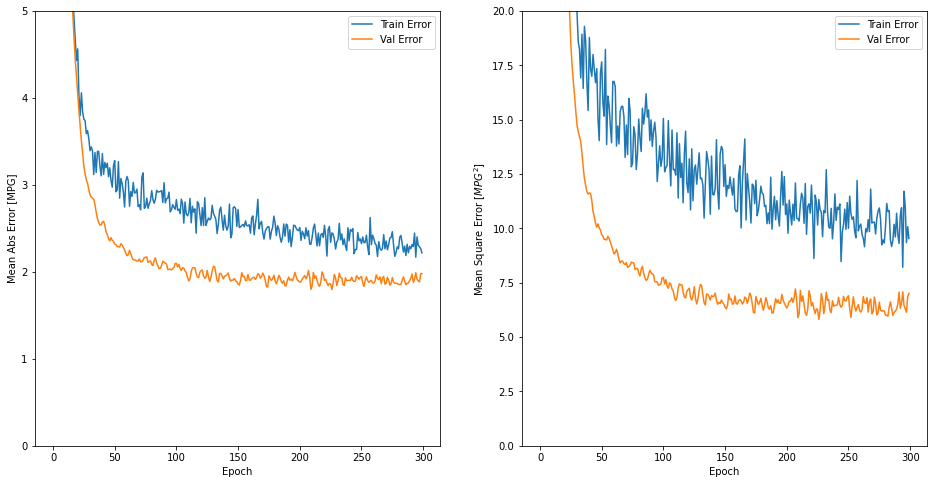

In [ ]:
plot_history(history)

### 모델 평가하기

In [ ]:
loss, mae, mse = model.evaluate(X_test_s, y_test, verbose=2)

3/3 - 0s - loss: 7.3321 - mae: 1.9812 - mse: 7.3321 - 20ms/epoch - 7ms/step


### 예측하기

In [ ]:
y_pred = model.predict(X_test_s)
y_pred

3/3 [==============================] - 0s 3ms/step


array([[23.194826 ],
       [20.941954 ],
       [34.320225 ],
       [23.606844 ],
       [28.314756 ],
       [29.303425 ],
       [12.490098 ],
       [30.518417 ],
       [18.087328 ],
       [29.06585  ],
       [14.874748 ],
       [21.620451 ],
       [17.256992 ],
       [28.516422 ],
       [16.151163 ],
       [29.924639 ],
       [17.944773 ],
       [33.30418  ],
       [27.463223 ],
       [27.076674 ],
       [19.324156 ],
       [43.27915  ],
       [35.64675  ],
       [15.921061 ],
       [28.235151 ],
       [22.45149  ],
       [17.647709 ],
       [17.012758 ],
       [27.98557  ],
       [19.903307 ],
       [14.003706 ],
       [20.93798  ],
       [19.741425 ],
       [33.09665  ],
       [13.549823 ],
       [36.955547 ],
       [14.61902  ],
       [23.473211 ],
       [13.760002 ],
       [10.6206875],
       [14.869408 ],
       [26.055895 ],
       [34.079693 ],
       [25.348623 ],
       [14.230044 ],
       [12.550278 ],
       [17.31192  ],
       [31.68

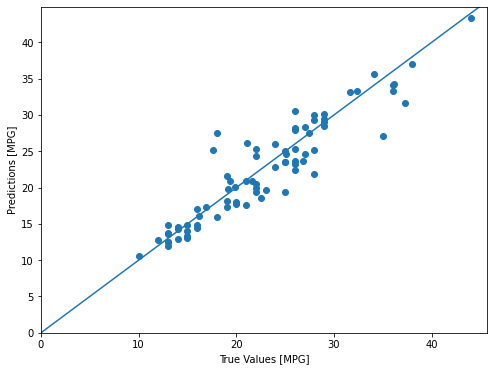

In [ ]:
# 예측 결과 시각화
y_pred = y_pred.flatten()

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()

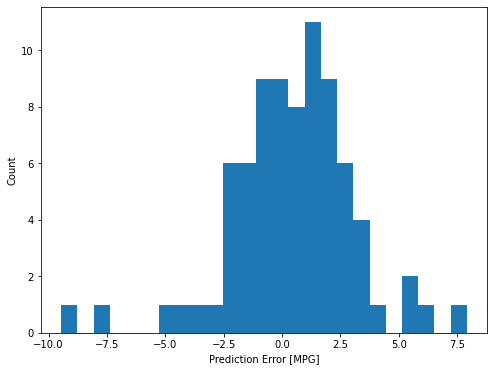

In [ ]:
# 오차 시각화
error = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")

plt.show()